# Preços da etanol e gasolina em novembro de 2019

Os dados foram obtidos atraves do site: http://repositorio.dados.gov.br/dataset/serie-historica-de-precos-de-combustiveis-por-revenda

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [110]:
df = pd.read_excel('Pasta1.xlsx', sheet_name='Planilha3')

In [111]:
df.head()

,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,CO,DF,BRASILIA,AUTO POSTO 306 NORTE LTDA,22398818000147,ETANOL,2019-11-06,3.199,NaN,R$ / litro,RAIZEN
1,CO,DF,BRASILIA,AUTO POSTO CHAVES LTDA,746278000102,ETANOL,2019-11-06,3.299,NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,CO,DF,BRASILIA,AUTO POSTO CRIOLO LTDA,27169700000160,ETANOL,2019-11-06,3.299,NaN,R$ / litro,RAIZEN
3,CO,DF,BRASILIA,AUTO POSTO EIXINHO LTDA,5470808000156,ETANOL,2019-11-06,3.049,NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
4,CO,DF,BRASILIA,AUTO POSTO ESQUINA LIMITADA,2551867000160,ETANOL,2019-11-06,3.189,2.8743,R$ / litro,BRANCA


In [112]:
df.shape

(43918, 11)

In [113]:
df['Unidade de Medida'].nunique()

1

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43918 entries, 0 to 43917
Data columns (total 11 columns):
Região - Sigla       43918 non-null object
Estado - Sigla       43918 non-null object
Município            43918 non-null object
Revenda              43918 non-null object
CNPJ da Revenda      43918 non-null int64
Produto              43918 non-null object
Data da Coleta       43918 non-null datetime64[ns]
Valor de Venda       43918 non-null float64
Valor de Compra      17011 non-null float64
Unidade de Medida    43918 non-null object
Bandeira             43918 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 3.7+ MB


In [115]:
df.drop(columns=['CNPJ da Revenda', 'Revenda', 'Data da Coleta', 'Unidade de Medida'], inplace=True)

In [116]:
df.isnull().sum()

Região - Sigla         0
Estado - Sigla         0
Município              0
Produto                0
Valor de Venda         0
Valor de Compra    26907
Bandeira               0
dtype: int64

61,3% de valores nulos na coluna Valor de Compra. 

In [117]:
df.describe()

,Valor de Venda,Valor de Compra
count,43918.000000,17011.000000
mean,2.813710,2.331749
std,1.686111,1.598201
min,0.003000,0.000300
25%,0.465000,0.382500
50%,3.179000,2.669500
75%,4.259000,3.837750
max,5.799000,4.709900


Temos que dividir a base para separar Etanol de Gasolina

In [118]:
df_e = df[df.Produto == 'ETANOL']

In [119]:
df_g = df[df.Produto == 'GASOLINA']

In [120]:
df_e.describe()

,Valor de Venda,Valor de Compra
count,20683.000000,7753.000000
mean,2.338963,2.231865
std,1.346823,1.160496
min,0.003000,0.000300
25%,0.379000,2.389800
50%,2.799000,2.573800
75%,3.199000,2.877600
max,4.999000,4.073900


In [121]:
df_g.describe()

,Valor de Venda,Valor de Compra
count,23235.000000,9258.000000
mean,3.236314,2.415396
std,1.838440,1.884237
min,0.005000,0.000400
25%,0.475000,0.378625
50%,4.199000,3.800700
75%,4.499000,4.037525
max,5.799000,4.709900


De acordo com ANP os valores médios de gasolina e etanol em R$/l para o mês de novembro são: 4,413 e 2,974.
Isso aponta que podem haver erros nessa base de dados.
http://www.anp.gov.br/precos-e-defesa-da-concorrencia/precos/levantamento-de-precos


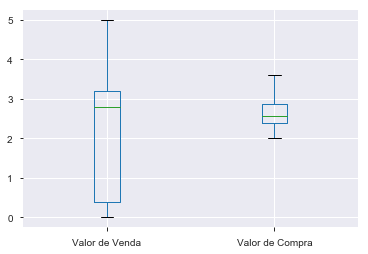

In [122]:
df_e.boxplot(column=['Valor de Venda', 'Valor de Compra'])

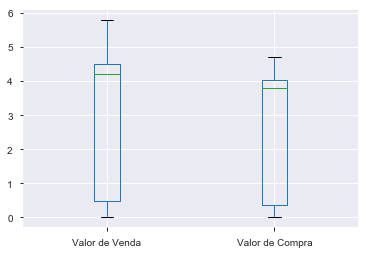

In [123]:
df_g.boxplot(column=['Valor de Venda', 'Valor de Compra'])

Podemos ver que há uma distribuição grande de valores de venda mas a mediana nos dois casos é maior que a mediana do valor de compra.

In [124]:
pd.value_counts(df_e['Região - Sigla'])
# Número de postos por região

SE    10958
NE     4087
S      2850
CO     2072
N       716
Name: Região - Sigla, dtype: int64

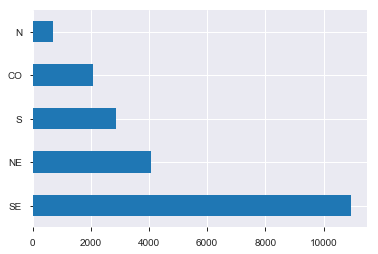

In [125]:
df_e['Região - Sigla'].value_counts().plot(kind='barh')

In [126]:
pd.value_counts(df_g['Região - Sigla'])

SE    11039
NE     4633
S      3940
CO     2067
N      1556
Name: Região - Sigla, dtype: int64

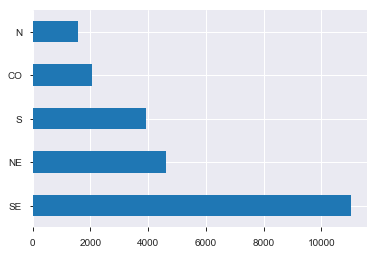

In [127]:
df_g['Região - Sigla'].value_counts().plot(kind='barh')

In [128]:
df_e['Bandeira'].value_counts().head()

BRANCA                          7453
PETROBRAS DISTRIBUIDORA S.A.    4967
RAIZEN                          3323
IPIRANGA                        3299
ALESAT                           496
Name: Bandeira, dtype: int64

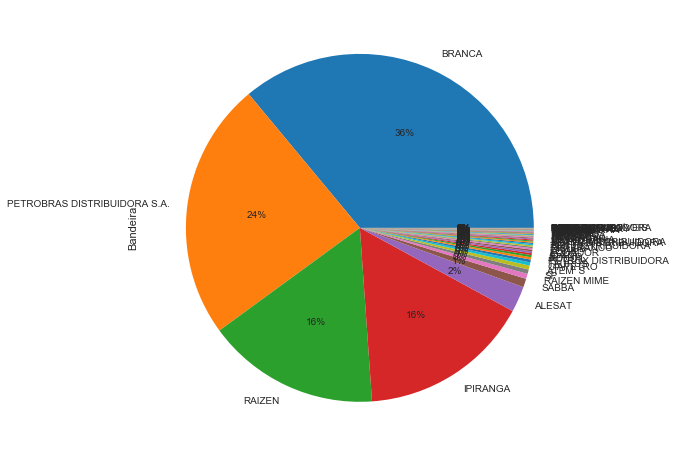

In [129]:
plt.figure(figsize=(12,8))
df_e['Bandeira'].value_counts().plot(kind='pie', autopct='%1.0f%%')

In [130]:
df_g['Bandeira'].value_counts().head()

BRANCA                          8105
PETROBRAS DISTRIBUIDORA S.A.    5537
IPIRANGA                        3917
RAIZEN                          3553
ALESAT                           554
Name: Bandeira, dtype: int64

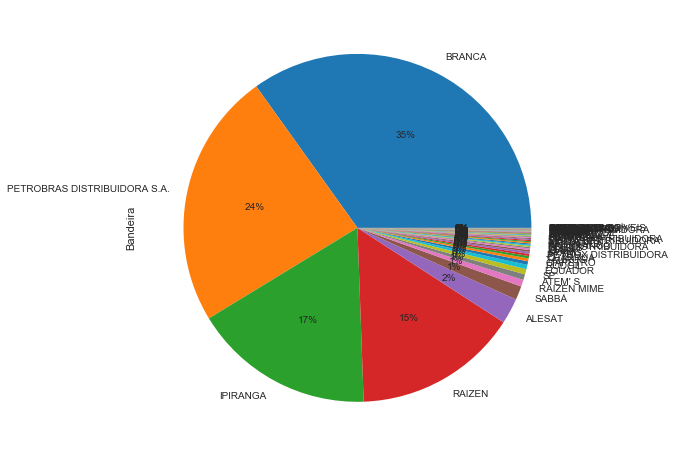

In [131]:
plt.figure(figsize=(12,8))
df_g['Bandeira'].value_counts().plot(kind='pie', autopct='%1.0f%%')

A distribuição através da chamada bandeira branca é a maior no setor. 

In [132]:
from pandas_profiling import ProfileReport

In [133]:
#profile_e = ProfileReport(df_e)
#profile_e

In [134]:
df_e.columns

Index(['Região - Sigla', 'Estado - Sigla', 'Município', 'Produto',
       'Valor de Venda', 'Valor de Compra', 'Bandeira'],
      dtype='object')

In [135]:
df_e.groupby('Estado - Sigla')['Valor de Venda'].mean()

Estado - Sigla
AC    0.836541
AL    2.191556
AM    0.585513
AP    3.699000
BA    1.563408
CE    1.394398
DF    2.971972
ES    1.550228
GO    1.523059
MA    2.455525
MG    2.422614
MS    2.684709
MT    2.112080
PA    2.132395
PB    1.441688
PE    2.236018
PI    2.768945
PR    1.027394
RJ    3.612462
RN    0.621320
RO    1.351223
RR    0.385357
RS    3.468846
SC    3.296839
SE    2.440519
SP    2.658445
TO    2.160711
Name: Valor de Venda, dtype: float64

In [136]:
df_g.groupby('Estado - Sigla')['Valor de Venda'].mean()

Estado - Sigla
AC    1.480679
AL    2.989703
AM    0.945087
AP    1.711607
BA    2.129390
CE    1.579304
DF    3.987793
ES    1.441273
GO    2.303050
MA    3.301269
MG    3.754894
MS    3.574557
MT    3.732273
PA    1.900353
PB    2.153560
PE    3.058136
PI    3.118963
PR    1.474150
RJ    4.500042
RN    0.900473
RO    2.077382
RR    0.638423
RS    4.004399
SC    3.899560
SE    2.461076
SP    3.997647
TO    2.876250
Name: Valor de Venda, dtype: float64

In [137]:
# Média para etanol
df_e.groupby('Região - Sigla')['Valor de Venda'].mean()

Região - Sigla
CO    2.018534
N     1.506605
NE    1.762808
S     2.146005
SE    2.719012
Name: Valor de Venda, dtype: float64

In [138]:
# Média para gasolina
df_g.groupby('Região - Sigla')['Valor de Venda'].mean()

Região - Sigla
CO    3.098894
N     1.766510
NE    2.349600
S     3.028466
SE    3.915553
Name: Valor de Venda, dtype: float64

In [139]:
# Mediana para etanol
df_e.groupby('Região - Sigla')['Valor de Venda'].median()

Região - Sigla
CO    2.599
N     0.386
NE    0.384
S     2.899
SE    2.844
Name: Valor de Venda, dtype: float64

In [140]:
# Mediana para gasolina
df_g.groupby('Região - Sigla')['Valor de Venda'].median()

Região - Sigla
CO    4.319
N     0.475
NE    0.484
S     4.099
SE    4.298
Name: Valor de Venda, dtype: float64

Os valores de venda nas regiões norte e nordeste tem uma variação grande em relação às outras regiões

In [141]:
pd.DataFrame(df_e.groupby('Bandeira')['Valor de Venda'].mean().loc[['BRANCA', 'PETROBRAS DISTRIBUIDORA S.A.','IPIRANGA', 'RAIZEN']]).rename(columns={'Valor de Venda': 'Valor de Venda Etanol'})

,Valor de Venda Etanol
Bandeira,
BRANCA,2.125258
PETROBRAS DISTRIBUIDORA S.A.,2.449838
IPIRANGA,2.597948
RAIZEN,2.483992


In [142]:
pd.DataFrame(df_g.groupby('Bandeira')['Valor de Venda'].mean().loc[['BRANCA', 'PETROBRAS DISTRIBUIDORA S.A.','IPIRANGA', 'RAIZEN']]).rename(columns={'Valor de Venda': 'Valor de Venda Gasolina'})

,Valor de Venda Gasolina
Bandeira,
BRANCA,3.018534
PETROBRAS DISTRIBUIDORA S.A.,3.312123
IPIRANGA,3.560169
RAIZEN,3.503250


Os postos bandeira branca tem em média um valor bem inferior quando comparados aos postos abastecidos pelas grandes distribuidoras

### Vamos tomar apenas a região Sudeste para a análise

In [143]:
len(df[df['Região - Sigla'] == 'SE']), len(df)

(21997, 43918)

In [144]:
df_se = df[df['Região - Sigla'] == 'SE']

In [145]:
df_se.to_csv('Preço de combustível no Sudeste.csv', index=False)